In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

In [110]:
df = pd.read_csv("cancer.csv")

In [111]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [112]:
df.max()

id                         911320502
diagnosis                          M
radius_mean                    28.11
texture_mean                   39.28
perimeter_mean                 188.5
area_mean                     2501.0
smoothness_mean               0.1634
compactness_mean              0.3454
concavity_mean                0.4268
concave points_mean           0.2012
symmetry_mean                  0.304
fractal_dimension_mean       0.09744
radius_se                      2.873
texture_se                     4.885
perimeter_se                   21.98
area_se                        542.2
smoothness_se                0.03113
compactness_se                0.1354
concavity_se                   0.396
concave points_se            0.05279
symmetry_se                  0.07895
fractal_dimension_se         0.02984
radius_worst                   36.04
texture_worst                  49.54
perimeter_worst                251.2
area_worst                    4254.0
smoothness_worst              0.2226
c

In [113]:
x_train = df[['radius_mean','texture_mean','perimeter_mean','concave points_mean','symmetry_mean']]
x_train = (x_train/x_train.max()).to_numpy()
y_train = df['diagnosis'].map({'M':0., 'B':1.}).to_numpy()

In [114]:
x_train

array([[0.63998577, 0.26425662, 0.65145889, 0.73111332, 0.79572368],
       [0.73176805, 0.45239308, 0.70503979, 0.34875746, 0.59605263],
       [0.70046247, 0.54098778, 0.68965517, 0.63568588, 0.68059211],
       ...,
       [0.59053718, 0.71486762, 0.57453581, 0.26351889, 0.52302632],
       [0.73283529, 0.74669043, 0.74323607, 0.7554672 , 0.78848684],
       [0.27605834, 0.62474542, 0.25421751, 0.        , 0.52203947]])

In [115]:
w_init = np.zeros((x_train.shape[1]))
b_init = 0.

In [116]:
x_train.shape

(569, 5)

In [117]:
np.dot(x_train[0],w_init)

np.float64(0.0)

In [125]:
def calc_cost(x,y,w,b): 
    m = x.shape[0]
    total_cost = 0.
    for i in range(m):
        f_w_b = 1/(1+pow(2.72, (-1)*(np.dot(w,x[i])+b)))
        total_cost+= (y[i]*(math.log(f_w_b))) + ((1-y[i])*math.log(1-f_w_b))
    return -total_cost/m

In [126]:
calc_cost(x_train, y_train, w_init, b_init)

np.float64(0.6931471805599468)

In [127]:
def calc_grad(x,y,w,b):
    m ,n= x.shape
    grad_w = np.zeros_like(w)
    grad_b = 0.
    for i in range(m):
        f_w_b_diff = (1/(1+pow(2.72, (-1)*(np.dot(w,x[i])+b)))) - y[i]
        for j in range(n):
            grad_w[j] += f_w_b_diff*x[i,j]
        grad_b += f_w_b_diff
    return grad_w/m, grad_b/m
        

In [128]:
def Gradient_Descent(x,y,w_in,b_in,lr,steps):
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    cost_hist=[]

    for i in range(steps):
        cost = calc_cost(x,y,w,b)
        cost_hist.append(cost)
        grad_w, grad_b = calc_grad(x,y,w,b)
        w = w - (lr*grad_w)
        b = b - (lr*grad_b)

        if (i%100==0):
            print(f"Cost: {cost}")

    return w,b,cost_hist
    

In [135]:
w,b,hist = Gradient_Descent(x_train, y_train, w_init, b_init, 0.1, 10000)

Cost: 0.6931471805599468
Cost: 0.6129987810662209
Cost: 0.5614551729267311
Cost: 0.5199644238995498
Cost: 0.48611676569614987
Cost: 0.45808765494110404
Cost: 0.43453601665859276
Cost: 0.41448044357046904
Cost: 0.39719695843746
Cost: 0.38214433170017437
Cost: 0.368911821006732
Cost: 0.3571829769804421
Cost: 0.34671046972007047
Cost: 0.33729839092633257
Cost: 0.32878964306797237
Cost: 0.32105682413505726
Cost: 0.3139955449622341
Cost: 0.30751946269699876
Cost: 0.3015565417998911
Cost: 0.29604620494839773
Cost: 0.2909371374121879
Cost: 0.28618557714506804
Cost: 0.28175397005169445
Cost: 0.27760990276069275
Cost: 0.27372524841103196
Cost: 0.27007547749239097
Cost: 0.26663909771073935
Cost: 0.2633971955524519
Cost: 0.2603330586327351
Cost: 0.2574318626852894
Cost: 0.2546804106326143
Cost: 0.2520669138896934
Cost: 0.249580808125674
Cost: 0.24721259730255032
Cost: 0.24495372104579266
Cost: 0.2427964413666548
Cost: 0.24073374551398133
Cost: 0.2387592623327641
Cost: 0.23686718998350684
Cost: 0.

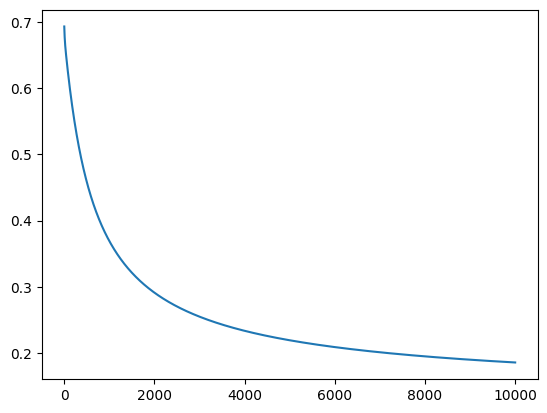

In [147]:
plt.plot(hist)

In [137]:
w, b

(array([ -4.20041417,  -3.57075165,  -4.66868452, -11.87626694,
          1.12634011]),
 np.float64(8.899074726798194))